In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
abtest = pd.read_excel('/content/AssignmentData1.xlsx', sheet_name = "ABTest")

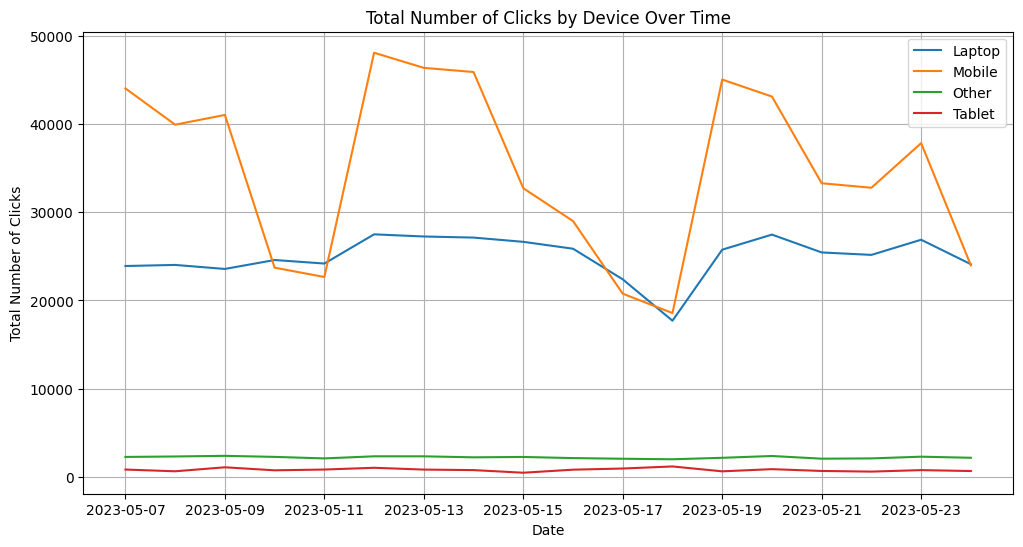

In [ ]:
# Convert 'Date' column to datetime type
abtest['Date'] = pd.to_datetime(abtest['Date'])

# Group by 'Date' and 'Device' and sum the clicks
clicks_by_device = abtest.groupby(['Date', 'Device'])['Clicks'].sum().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))

# Iterate over each device type
for device in clicks_by_device['Device'].unique():
    device_data = clicks_by_device[clicks_by_device['Device'] == device]
    plt.plot(device_data['Date'], device_data['Clicks'], label=device)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.title('Total Number of Clicks by Device Over Time')
plt.legend()
plt.grid(True)
plt.show()

# As we can see the orange line which represents the Mobile has the steepest lines, therefore we can conclude that Mobile performed the best.

In [ ]:


# Given values
MDE = 0.03  # 3% minimum detectable effect
alpha = 0.05  # 95% significance level
power = 0.80  # 80% power

# Calculate Z-scores
Z_alpha_2 = stats.norm.ppf(1 - alpha/2)
Z_beta = stats.norm.ppf(power)

# Assuming variance = 1 for simplicity
Var = 1

# Calculate sample size per group
n = (2 * (Z_alpha_2 + Z_beta)**2 * Var) / (MDE**2)

print("Sample size required per group:", round(n))


Sample size required per group: 17442


In [ ]:
# Count the number of observations in each group
control_group_size = abtest[abtest['Group'] == 'Control'].shape[0]
experiment_group_size = abtest[abtest['Group'] == 'Experiment'].shape[0]

# Assuming equal sizes for simplicity
current_sample_size = 2 * control_group_size

print(current_sample_size)

# Compare with calculated sample size
if current_sample_size >= n:
    print("We have sufficient sample size to conclude the test.")
else:
    print("We do not have sufficient sample size to conclude the test. More data may be needed.")

21094
We have sufficient sample size to conclude the test.


The current sample size is 21094 and the required is 17442, therefore we can conclude the test.

# **Doing the A/B test from the data given**

In [ ]:

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    # Calculate conversion rates
    control_conversion_rate = control_conversions / control_visitors
    treatment_conversion_rate = treatment_conversions / treatment_visitors

    # Calculate z-score
    z_score = (treatment_conversion_rate - control_conversion_rate) / \
              ((control_conversion_rate * (1 - control_conversion_rate) / control_visitors) + \
               (treatment_conversion_rate * (1 - treatment_conversion_rate) / treatment_visitors))**0.5

    # Determine critical z-value based on confidence level
    if confidence_level == 90:
        critical_z_value = stats.norm.ppf(0.95)
    elif confidence_level == 95:
        critical_z_value = stats.norm.ppf(0.975)
    elif confidence_level == 99:
        critical_z_value = stats.norm.ppf(0.995)
    else:
        raise ValueError("Confidence level must be 90, 95, or 99")

    # Compare z-score with critical z-value and output result
    if z_score > critical_z_value:
        return "Experiment Group is Better"
    elif z_score < -critical_z_value:
        return "Control Group is Better"
    else:
        return "Indeterminate"

# Extract data from the abtest DataFrame
control_visitors = abtest[abtest['Group'] == 'Control']['Visitors'].sum()
control_conversions = abtest[abtest['Group'] == 'Control']['Clicks'].sum()
treatment_visitors = abtest[abtest['Group'] == 'Experiment']['Visitors'].sum()
treatment_conversions = abtest[abtest['Group'] == 'Experiment']['Clicks'].sum()
confidence_level = 95  # Assuming 95% confidence level

# Perform the A/B test using real data
result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("Result of A/B test:", result)


Result of A/B test: Experiment Group is Better


In [ ]:
print(control_visitors)
print(control_conversions)
print(treatment_visitors)
print(treatment_conversions)

7977808
874767
989983
258231


# **Creating a Streamlit app to do the A/B test**

In [ ]:
import streamlit as st

# Function to perform A/B test
def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    # Calculate conversion rates
    control_conversion_rate = control_conversions / control_visitors
    treatment_conversion_rate = treatment_conversions / treatment_visitors

    # Calculate z-score
    z_score = (treatment_conversion_rate - control_conversion_rate) / \
              ((control_conversion_rate * (1 - control_conversion_rate) / control_visitors) + \
               (treatment_conversion_rate * (1 - treatment_conversion_rate) / treatment_visitors))**0.5

    # Determine critical z-value based on confidence level
    if confidence_level == 90:
        critical_z_value = stats.norm.ppf(0.95)
    elif confidence_level == 95:
        critical_z_value = stats.norm.ppf(0.975)
    elif confidence_level == 99:
        critical_z_value = stats.norm.ppf(0.995)
    else:
        raise ValueError("Confidence level must be 90, 95, or 99")

    # Compare z-score with critical z-value and output result
    if z_score > critical_z_value:
        return "Experiment Group is Better"
    elif z_score < -critical_z_value:
        return "Control Group is Better"
    else:
        return "Indeterminate"

def main():
    st.title('A/B Test Hypothesis Test')

    # User inputs
    control_visitors = st.number_input('Control Group Visitors', min_value=1, step=1)
    control_conversions = st.number_input('Control Group Conversions', min_value=0, step=1)
    treatment_visitors = st.number_input('Treatment Group Visitors', min_value=1, step=1)
    treatment_conversions = st.number_input('Treatment Group Conversions', min_value=0, step=1)
    confidence_level = st.select_slider('Confidence Level', options=[90, 95, 99])

    # Perform A/B test when user clicks the button
    if st.button('Perform A/B Test'):
        result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
        st.write('Result of A/B test:', result)

if __name__ == '__main__':
    main()
